In [1]:
import sys
sys.path.append("../")  # path contains python_file.py

In [2]:
import iris
import numpy as np
import scipy.stats
from cf_units import num2date

import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

# ISIMIP3BASD v2.5 reference implementation

Pull v2.5 of the ISIMIP3BASD reference implementation -- the version implemented. Unpack the code

In [4]:
!wget https://zenodo.org/record/6758997/files/isimip3basd-master.tar.gz
!tar -xf isimip3basd-master.tar.gz

--2022-07-14 13:53:34--  https://zenodo.org/record/6758997/files/isimip3basd-master.tar.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12112564 (12M) [application/octet-stream]
Saving to: ‘isimip3basd-master.tar.gz.1’

  isimip3basd-maste  38%[======>             ]   4,41M  2,44MB/s               ^C


Run ISIMIP3BASD reference code through. 

This is the standard call from `application_example.sh`. Modifications: 
- Adjusted the paths to `bias_adjustment.py` and the data (in `-o`, `-s`, `-f` and `-b`).
- Added a flag `--n-quantiles 15000` to ensure a high number of quantiles for comparison. With a lower number of quantiles differences between our implementation and the ISIMIP reference get bigger due to the ISIMIP linear interpolation being not exact. Those are not directly used, but the number gets reduced to a high isimip default.
- Added `2> isimip_output.txt` to write stderr to file.

In [4]:
!python -u isimip3basd-master/code/bias_adjustment.py \
--n-quantiles 15000 \
--n-processes 5 \
--randomization-seed 0 \
--step-size 1 \
-v hurs,pr,prsnratio,ps,rlds,rsds,sfcWind,tas,tasrange,tasskew \
--lower-bound 0,0,0,,,0,0,,0,0 \
--lower-threshold .01,.0000011574,.0001,,,.0001,.01,,.01,.0001 \
--upper-bound 100,,1,,,1,,,,1 \
--upper-threshold 99.99,,.9999,,,.9999,,,,.9999 \
--distribution ,gamma,,normal,normal,,weibull,normal,weibull, \
-t bounded,mixed,bounded,additive,additive,bounded,mixed,additive,mixed,bounded \
--unconditional-ccs-transfer 1,,,,,,,,, \
--trendless-bound-frequency 1,,,,,,,,, \
-d ,,,1,1,,,1,, \
-w 0,0,0,0,0,15,0,0,0,0 \
--if-all-invalid-use ,,0.,,,,,,, \
-o isimip3basd-master/data/hurs_obs-hist_coarse_1979-2014.nc,isimip3basd-master/data/pr_obs-hist_coarse_1979-2014.nc,isimip3basd-master/data/prsnratio_obs-hist_coarse_1979-2014.nc,isimip3basd-master/data/ps_obs-hist_coarse_1979-2014.nc,isimip3basd-master/data/rlds_obs-hist_coarse_1979-2014.nc,isimip3basd-master/data/rsds_obs-hist_coarse_1979-2014.nc,isimip3basd-master/data/sfcWind_obs-hist_coarse_1979-2014.nc,isimip3basd-master/data/tas_obs-hist_coarse_1979-2014.nc,isimip3basd-master/data/tasrange_obs-hist_coarse_1979-2014.nc,isimip3basd-master/data/tasskew_obs-hist_coarse_1979-2014.nc \
-s isimip3basd-master/data/hurs_sim-hist_coarse_1979-2014.nc,isimip3basd-master/data/pr_sim-hist_coarse_1979-2014.nc,isimip3basd-master/data/prsnratio_sim-hist_coarse_1979-2014.nc,isimip3basd-master/data/ps_sim-hist_coarse_1979-2014.nc,isimip3basd-master/data/rlds_sim-hist_coarse_1979-2014.nc,isimip3basd-master/data/rsds_sim-hist_coarse_1979-2014.nc,isimip3basd-master/data/sfcWind_sim-hist_coarse_1979-2014.nc,isimip3basd-master/data/tas_sim-hist_coarse_1979-2014.nc,isimip3basd-master/data/tasrange_sim-hist_coarse_1979-2014.nc,isimip3basd-master/data/tasskew_sim-hist_coarse_1979-2014.nc \
-f isimip3basd-master/data/hurs_sim-fut_coarse_2065-2100.nc,isimip3basd-master/data/pr_sim-fut_coarse_2065-2100.nc,isimip3basd-master/data/prsnratio_sim-fut_coarse_2065-2100.nc,isimip3basd-master/data/ps_sim-fut_coarse_2065-2100.nc,isimip3basd-master/data/rlds_sim-fut_coarse_2065-2100.nc,isimip3basd-master/data/rsds_sim-fut_coarse_2065-2100.nc,isimip3basd-master/data/sfcWind_sim-fut_coarse_2065-2100.nc,isimip3basd-master/data/tas_sim-fut_coarse_2065-2100.nc,isimip3basd-master/data/tasrange_sim-fut_coarse_2065-2100.nc,isimip3basd-master/data/tasskew_sim-fut_coarse_2065-2100.nc \
-b isimip3basd-master/data/hurs_sim-fut-basd_coarse_2065-2100.nc,isimip3basd-master/data/pr_sim-fut-basd_coarse_2065-2100.nc,isimip3basd-master/data/prsnratio_sim-fut-basd_coarse_2065-2100.nc,isimip3basd-master/data/ps_sim-fut-basd_coarse_2065-2100.nc,isimip3basd-master/data/rlds_sim-fut-basd_coarse_2065-2100.nc,isimip3basd-master/data/rsds_sim-fut-basd_coarse_2065-2100.nc,isimip3basd-master/data/sfcWind_sim-fut-basd_coarse_2065-2100.nc,isimip3basd-master/data/tas_sim-fut-basd_coarse_2065-2100.nc,isimip3basd-master/data/tasrange_sim-fut-basd_coarse_2065-2100.nc,isimip3basd-master/data/tasskew_sim-fut-basd_coarse_2065-2100.nc \
2> isimip_output.txt

checking inputs ...
adjusting at location (lon, lat) ...
(1, 1)
(1, 0)
(0, 1)
(0, 0)


A number of warnings gets generated indicating that the number of quantiles get reduced to a high ISIMIP default. 

# Our implementation

In [4]:
from PACKAGE_NAME.debias import ISIMIP

## Helpers

This reads in the ISIMIP-testing and debiased data and gets the dates (last coordinate):

In [5]:
# Given an iris-cube this returns the dates stored in the last time-dimension
def get_dates(x):
    time_dimension = x.coords()[2]
    dates = time_dimension.units.num2date(time_dimension.points)
    return dates

get_dates = np.vectorize(get_dates)

# This reads in the testing-data from ISIMIP stored in isimip3basd-master/data
def read_in_and_preprocess_isimip_testing_data_with_dates(variable, isimip_data_path = "isimip3basd-master/data/"):
    
    # Load in data
    obs = iris.load_cube(isimip_data_path+variable+"_obs-hist_coarse_1979-2014.nc")
    cm_hist = iris.load_cube(isimip_data_path+variable+"_sim-hist_coarse_1979-2014.nc")
    cm_future = iris.load_cube(isimip_data_path+variable+"_sim-fut_coarse_2065-2100.nc")

    # Extract dates
    dates = {
        "time_obs_hist": get_dates(obs),
        "time_cm_hist": get_dates(cm_hist),
        "time_cm_future": get_dates(cm_future)
    }
    
    # Convert to np.array (from masked-array)
    obs = np.array(obs.data)
    cm_hist = np.array(cm_hist.data)
    cm_future = np.array(cm_future.data)

    # Move time to first axis (our convention)
    obs = np.moveaxis(obs, -1, 0)
    cm_hist = np.moveaxis(cm_hist, -1, 0)
    cm_future = np.moveaxis(cm_future, -1, 0)
    
    return obs, cm_hist, cm_future, dates

def read_in_debiased_testing_data(variable, isimip_data_path = "isimip3basd-master/data/"):
    
    # Load in data
    debiased_data = iris.load_cube(isimip_data_path+variable+"_sim-fut-basd_coarse_2065-2100.nc")
    
    # Move time to first axis (our convention)
    debiased_data = np.array(debiased_data.data)
    debiased_data = np.moveaxis(debiased_data, -1, 0)
    
    return debiased_data

## Tas

Run our ISIMIP implementation:

In [6]:
variable = "tas"
obs, cm_hist, cm_future, dates = read_in_and_preprocess_isimip_testing_data_with_dates(variable)
debiaser = ISIMIP.from_variable(variable)
debiased_values = debiaser.apply(obs, cm_hist, cm_future, **dates)

----- Running debiasing -----


100%|██████████| 4/4 [00:21<00:00,  5.32s/it]


Compare:

In [7]:
debiased_values_isimip = read_in_debiased_testing_data(variable)
pct_agreement = np.sum(np.isclose(debiased_values,debiased_values_isimip))/debiased_values.size
print("Percentage agreement is %s "%(pct_agreement*100))

Percentage agreement is 100.0 


Plot over time:

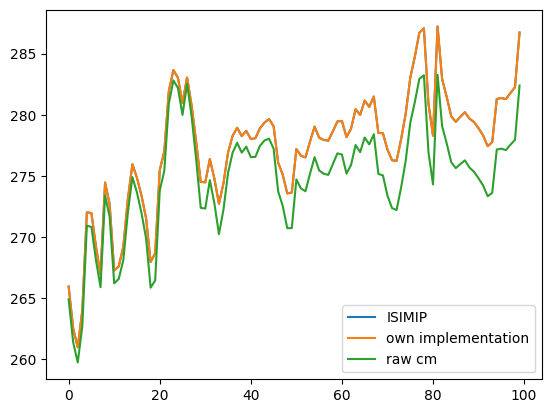

In [8]:
min_time = 0
max_time = 100
lat = 1
lon = 1
time = np.arange(min_time, max_time)

plt.plot(time, debiased_values_isimip[min_time:max_time, lat, lon], label = "ISIMIP")
plt.plot(time, debiased_values[min_time:max_time, lat, lon], label = "own implementation")
plt.plot(time, cm_future[min_time:max_time, lat, lon], label = "raw cm")
plt.legend()
plt.show()

Values of reference implementation against ours:

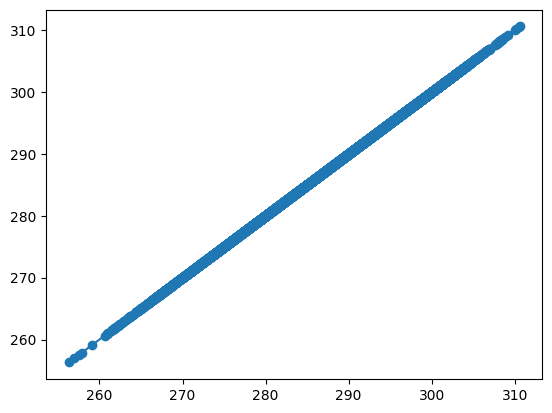

In [9]:
min_all_values = np.min([np.min(debiased_values), np.min(debiased_values_isimip)])
max_all_values = np.max([np.max(debiased_values), np.max(debiased_values_isimip)])

plt.scatter(debiased_values_isimip.flatten(), debiased_values.flatten())
plt.plot([min_all_values, max_all_values], [min_all_values, max_all_values])
plt.show()

Linear Regression:

In [10]:
scipy.stats.linregress(debiased_values_isimip.flatten(), debiased_values.flatten())

LinregressResult(slope=0.9999998728613527, intercept=2.532459893700434e-05, rvalue=0.9999999999943137, pvalue=0.0, stderr=1.4705499476000933e-08)

It seems we can reproduce tas quite well.

## Pr

In [11]:
variable = "pr"
obs, cm_hist, cm_future, dates = read_in_and_preprocess_isimip_testing_data_with_dates(variable)
debiaser = ISIMIP.from_variable(variable)
debiased_values = debiaser.apply(obs, cm_hist, cm_future, **dates)

----- Running debiasing -----


100%|██████████| 4/4 [00:12<00:00,  3.07s/it]


Compare:

In [12]:
debiased_values_isimip = read_in_debiased_testing_data(variable)
pct_agreement = np.sum(np.isclose(debiased_values,debiased_values_isimip))/debiased_values.size
print("Percentage agreement is %s "%(pct_agreement*100))

Percentage agreement is 93.83746577426224 


Plot over time:

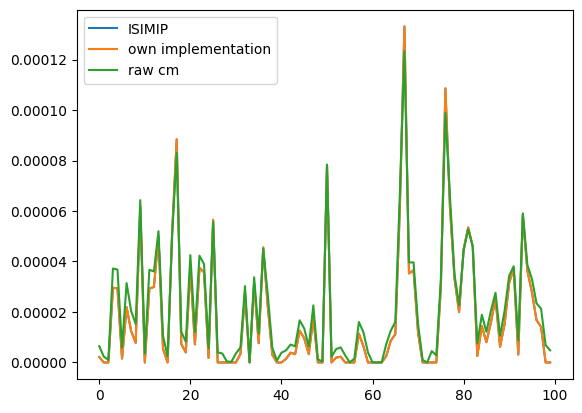

In [13]:
min_time = 0
max_time = 100
lat = 1
lon = 1
time = np.arange(min_time, max_time)

plt.plot(time, debiased_values_isimip[min_time:max_time, lat, lon], label = "ISIMIP")
plt.plot(time, debiased_values[min_time:max_time, lat, lon], label = "own implementation")
plt.plot(time, cm_future[min_time:max_time, lat, lon], label = "raw cm")
plt.legend()
plt.show()

Values of reference implementation against ours:

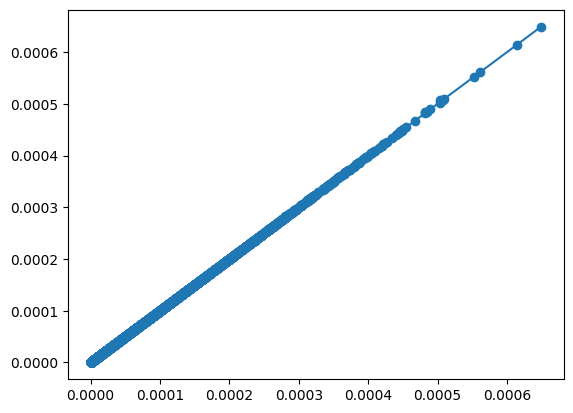

In [14]:
min_all_values = np.min([np.min(debiased_values), np.min(debiased_values_isimip)])
max_all_values = np.max([np.max(debiased_values), np.max(debiased_values_isimip)])

plt.scatter(debiased_values_isimip.flatten(), debiased_values.flatten())
plt.plot([min_all_values, max_all_values], [min_all_values, max_all_values])
plt.show()

Linear Regression:

In [15]:
scipy.stats.linregress(debiased_values_isimip.flatten(), debiased_values.flatten())

LinregressResult(slope=1.000057698734256, intercept=8.03767682395855e-10, rvalue=0.9999993854327316, pvalue=0.0, stderr=4.834742888003417e-06)

It seems we can reproduce pr quite well.

## Psl

In [16]:
variable = "psl"
obs, cm_hist, cm_future, dates = read_in_and_preprocess_isimip_testing_data_with_dates("ps")
debiaser = ISIMIP.from_variable(variable)
debiased_values = debiaser.apply(obs, cm_hist, cm_future, **dates)

----- Running debiasing -----


100%|██████████| 4/4 [00:20<00:00,  5.18s/it]


Compare:

In [17]:
debiased_values_isimip = read_in_debiased_testing_data("ps")
pct_agreement = np.sum(np.isclose(debiased_values,debiased_values_isimip))/debiased_values.size
print("Percentage agreement is %s "%(pct_agreement*100))

Percentage agreement is 100.0 


Plot over time:

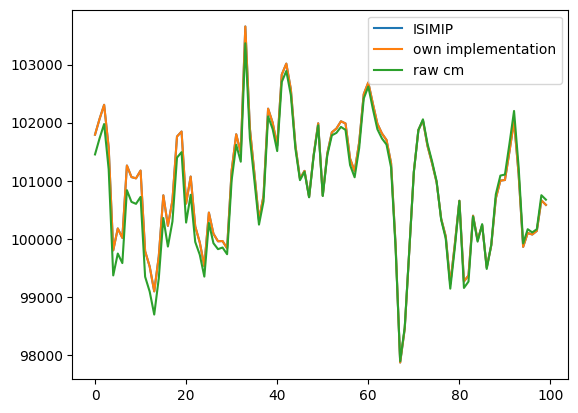

In [18]:
min_time = 0
max_time = 100
lat = 1
lon = 1
time = np.arange(min_time, max_time)

plt.plot(time, debiased_values_isimip[min_time:max_time, lat, lon], label = "ISIMIP")
plt.plot(time, debiased_values[min_time:max_time, lat, lon], label = "own implementation")
plt.plot(time, cm_future[min_time:max_time, lat, lon], label = "raw cm")
plt.legend()
plt.show()

Values of reference implementation against ours:

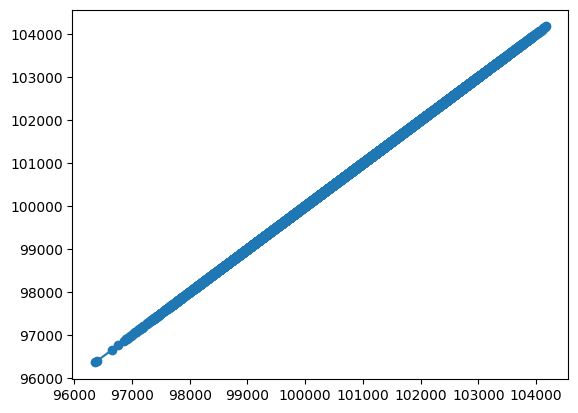

In [19]:
min_all_values = np.min([np.min(debiased_values), np.min(debiased_values_isimip)])
max_all_values = np.max([np.max(debiased_values), np.max(debiased_values_isimip)])

plt.scatter(debiased_values_isimip.flatten(), debiased_values.flatten())
plt.plot([min_all_values, max_all_values], [min_all_values, max_all_values])
plt.show()

Linear Regression:

In [20]:
scipy.stats.linregress(debiased_values_isimip.flatten(), debiased_values.flatten())

LinregressResult(slope=0.9999999951431144, intercept=-0.009368685408844613, rvalue=0.9999999999776888, pvalue=0.0, stderr=2.9128922281955855e-08)

It seems we can reproduce psl quite well.

## Rlds

Run our ISIMIP implementation:

In [6]:
variable = "rlds"
obs, cm_hist, cm_future, dates = read_in_and_preprocess_isimip_testing_data_with_dates(variable)
debiaser = ISIMIP.from_variable(variable)
debiased_values = debiaser.apply(obs, cm_hist, cm_future, **dates)

----- Running debiasing -----


100%|██████████| 4/4 [00:17<00:00,  4.46s/it]


Compare:

In [7]:
debiased_values_isimip = read_in_debiased_testing_data(variable)
pct_agreement = np.sum(np.isclose(debiased_values,debiased_values_isimip))/debiased_values.size
print("Percentage agreement is %s "%(pct_agreement*100))

Percentage agreement is 100.0 


Plot over time:

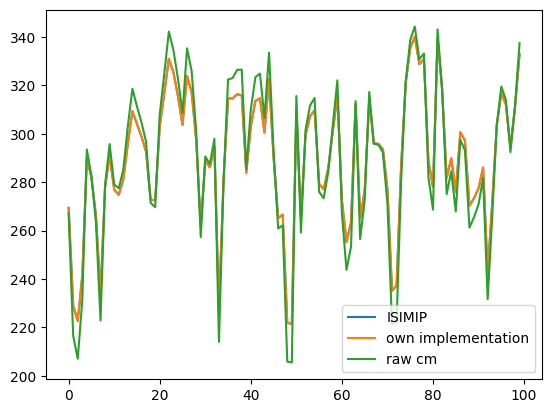

In [8]:
min_time = 0
max_time = 100
lat = 1
lon = 1
time = np.arange(min_time, max_time)

plt.plot(time, debiased_values_isimip[min_time:max_time, lat, lon], label = "ISIMIP")
plt.plot(time, debiased_values[min_time:max_time, lat, lon], label = "own implementation")
plt.plot(time, cm_future[min_time:max_time, lat, lon], label = "raw cm")
plt.legend()
plt.show()

Values of reference implementation against ours:

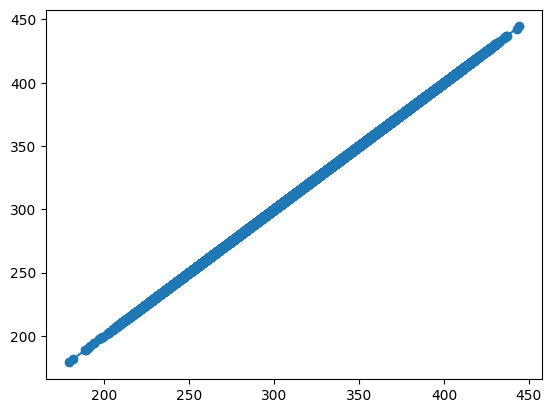

In [9]:
min_all_values = np.min([np.min(debiased_values), np.min(debiased_values_isimip)])
max_all_values = np.max([np.max(debiased_values), np.max(debiased_values_isimip)])

plt.scatter(debiased_values_isimip.flatten(), debiased_values.flatten())
plt.plot([min_all_values, max_all_values], [min_all_values, max_all_values])
plt.show()

Linear Regression:

In [10]:
scipy.stats.linregress(debiased_values_isimip.flatten(), debiased_values.flatten())

LinregressResult(slope=1.0000000224862213, intercept=-6.843278475798797e-05, rvalue=0.9999999999997392, pvalue=0.0, stderr=3.14927108323425e-09)

It seems we can reproduce rlds quite well.

# SfcWind

In [6]:
variable = "sfcWind"
obs, cm_hist, cm_future, dates = read_in_and_preprocess_isimip_testing_data_with_dates(variable)
debiaser = ISIMIP.from_variable(variable)
debiased_values = debiaser.apply(obs, cm_hist, cm_future, **dates)

----- Running debiasing -----


100%|██████████| 4/4 [01:11<00:00, 17.94s/it]


Compare:

In [7]:
debiased_values_isimip = read_in_debiased_testing_data(variable)
pct_agreement = np.sum(np.isclose(debiased_values,debiased_values_isimip))/debiased_values.size
max_deviation = np.max(np.abs(debiased_values-debiased_values_isimip))
print("Percentage agreement is %s with max deviation %s"%(pct_agreement*100, max_deviation))

Percentage agreement is 9.573699421965317 with max deviation 0.003522873


Plot over time:

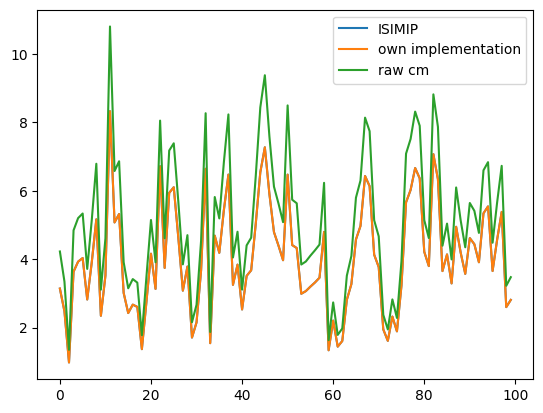

In [8]:
min_time = 0
max_time = 100
lat = 1
lon = 1
time = np.arange(min_time, max_time)

plt.plot(time, debiased_values_isimip[min_time:max_time, lat, lon], label = "ISIMIP")
plt.plot(time, debiased_values[min_time:max_time, lat, lon], label = "own implementation")
plt.plot(time, cm_future[min_time:max_time, lat, lon], label = "raw cm")
plt.legend()
plt.show()

Values of reference implementation against ours:

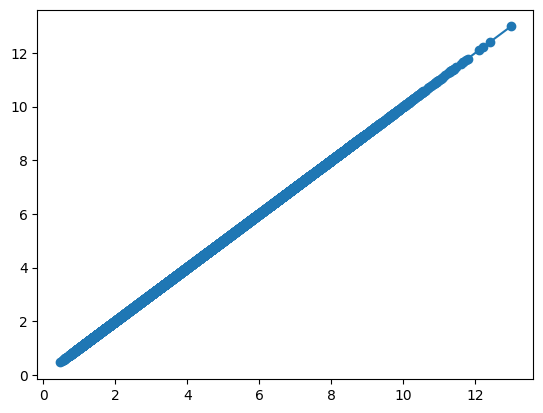

In [9]:
min_all_values = np.min([np.min(debiased_values), np.min(debiased_values_isimip)])
max_all_values = np.max([np.max(debiased_values), np.max(debiased_values_isimip)])

plt.scatter(debiased_values_isimip.flatten(), debiased_values.flatten())
plt.plot([min_all_values, max_all_values], [min_all_values, max_all_values])
plt.show()

Linear Regression:

In [10]:
scipy.stats.linregress(debiased_values_isimip.flatten(), debiased_values.flatten())

LinregressResult(slope=1.0000021330821292, intercept=-8.191132122803424e-06, rvalue=0.9999999715602359, pvalue=0.0, stderr=1.039985640948038e-06)

The deviation is slightly more than the numerical accuracy. However the results seem generally in agreement. Reasons for this:
- ISIMIP interpolation
- The distribution fits in step6 are slightly different most likely due to floating point differences.

# Tasrange

In [11]:
variable = "tasrange"
obs, cm_hist, cm_future, dates = read_in_and_preprocess_isimip_testing_data_with_dates(variable)
debiaser = ISIMIP.from_variable(variable)
debiased_values = debiaser.apply(obs, cm_hist, cm_future, **dates)

----- Running debiasing -----


100%|██████████| 4/4 [01:17<00:00, 19.45s/it]


Compare:

In [12]:
debiased_values_isimip = read_in_debiased_testing_data(variable)
pct_agreement = np.sum(np.isclose(debiased_values,debiased_values_isimip))/debiased_values.size
max_deviation = np.max(np.abs(debiased_values-debiased_values_isimip))
print("Percentage agreement is %s with max deviation %s"%(pct_agreement*100, max_deviation))

Percentage agreement is 13.33092485549133 with max deviation 0.005678177


Plot over time:

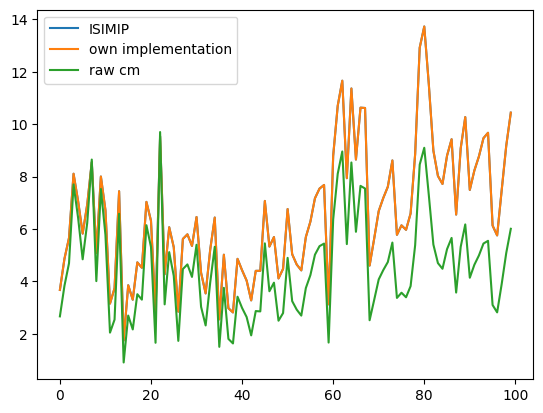

In [13]:
min_time = 0
max_time = 100
lat = 1
lon = 1
time = np.arange(min_time, max_time)

plt.plot(time, debiased_values_isimip[min_time:max_time, lat, lon], label = "ISIMIP")
plt.plot(time, debiased_values[min_time:max_time, lat, lon], label = "own implementation")
plt.plot(time, cm_future[min_time:max_time, lat, lon], label = "raw cm")
plt.legend()
plt.show()

Values of reference implementation against ours:

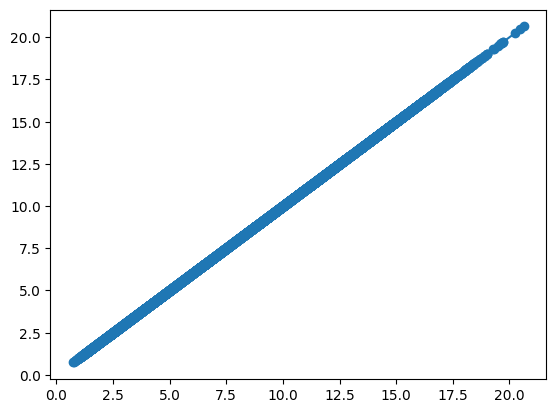

In [14]:
min_all_values = np.min([np.min(debiased_values), np.min(debiased_values_isimip)])
max_all_values = np.max([np.max(debiased_values), np.max(debiased_values_isimip)])

plt.scatter(debiased_values_isimip.flatten(), debiased_values.flatten())
plt.plot([min_all_values, max_all_values], [min_all_values, max_all_values])
plt.show()

Linear Regression:

In [15]:
scipy.stats.linregress(debiased_values_isimip.flatten(), debiased_values.flatten())

LinregressResult(slope=0.9999986970893849, intercept=1.5534482123769067e-05, rvalue=0.9999999844855442, pvalue=0.0, stderr=7.681236296246608e-07)

The deviation is slightly more than the numerical accuracy. However the results seem generally in agreement. Reasons for this:
- ISIMIP interpolation
- The distribution fits in step6 are slightly different most likely due to floating point differences.

# Questions

- For SfcWind and tasskew differences are slightly bigger than floating point accuracy. Is that bad?

# Missing

- hurs
- prsnratio
- rsds
- tasskew

All are mapped nonparametically: need to add that option. rsds needs step1 in addition.

# Also add: 

- goodness of fit tests and fallback to nonparametric qm.